In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation
from salishsea_tools.nc_tools import scDataset
from matplotlib import colors
from matplotlib import ticker
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
import matplotlib as mpl
import numpy.ma as ma
from scipy import interpolate
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/upwelling_depth/')
import upwelling_functions
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions
import quicklook

import warnings
warnings.filterwarnings("ignore")

import time
from datetime import datetime 

/home/imachuca/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
def plot_setup_start():
    fig = plt.figure(figsize=(12, 8))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1,0.2])
    ax = plt.subplot(gs[0, 0])
    leg = plt.subplot(gs[0, 1]); leg.axis('off')
    return fig, ax

def plot_setup_end(fig, ax, fs_numb, fs_str):
    ax.set_xticks([1, 2, 4])
    ax.set_xticklabels(['half', 'base', 'double'])
    ax.grid(which='major', axis='both', linestyle='-')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', which='both', length=0, labelsize=fs_numb)
    ax.set_ylabel('Normalized metric:\nCTW amplitude', fontsize=fs_str, labelpad=20)
    ax.set_xlabel('Wind forcing cases', fontsize=fs_str, labelpad=20)

    fig.tight_layout()
    fig.patch.set_facecolor('white')    
    plt.subplots_adjust(top=0.99, wspace=0.1, hspace=0.1)
    
    return fig, ax

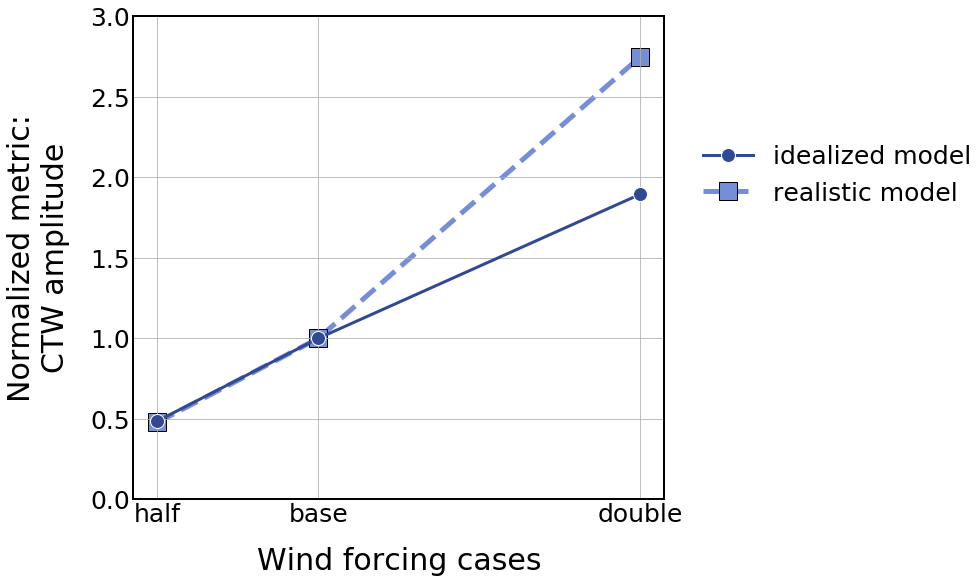

In [5]:
flag = 'wave'
figure_name = 'fig_comparison_amplitude.png'

fs_numb, fs_str = 25, 30
colors = ['#6580D2', '#283C78']
markers = ['o', 's']
kinds = ['ideal', 'real']
xs_list = [1, 2, 4]

fig, ax = plot_setup_start()

comp_matrix_r = np.loadtxt('./files/comparison_'+flag+'_'+'real.out', delimiter=",")
comp_list_r = comp_matrix_r[-1, 1:]

comp_matrix_i = np.loadtxt('./files/comparison_'+flag+'_'+'ideal.out', delimiter=",")
comp_list_i = comp_matrix_i[-1, 1:]

ls_i = ax.plot(xs_list, comp_list_i, 
               lw=3, marker='o', ms=14, c='#314992', ls='-', markeredgecolor='w', label='idealized model', zorder=2)
ls_r = ax.plot(xs_list, comp_list_r, 
               lw=5, marker='s', ms=18, c='#768ED7', ls='--', markeredgecolor='k', label='realistic model', zorder=1)

lns = ls_i + ls_r
labels = [l.get_label() for l in lns]
leg = fig.legend(lns, labels, loc='upper right', bbox_to_anchor=(1.15, 0.8), fontsize=fs_numb, ncol=1, frameon=False)
            
ax.set_aspect(aspect='equal')
ax.yaxis.set_ticks(np.arange(0, 3.5, 0.5))
ax.set_ylim([0, 3.0])
fig, ax = plot_setup_end(fig, ax, fs_numb, fs_str)
fig.savefig(figure_name, dpi=200, bbox_inches='tight', format='png', facecolor=fig.get_facecolor())